## Maps

In [1]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
# import seaborn as sns
import requests
from PIL import Image

# %matplotlib inline
# sns.set(color_codes=True)

In [2]:
df = pd.read_csv('boba-nyc.csv')
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,96,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['delivery', 'pickup']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.9962197 40.7191742)
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media3.fl.yelpcdn.com/bphoto/RzKMKS...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,58,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['delivery', 'pickup']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775000000001 40.7288)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,28,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","['delivery', 'pickup']",$$,"{'address1': '23 Clinton St', 'address2': None...",NaN,NaN,1877.016204,40.720597,-73.984539,POINT (-73.984539 40.720597)
3,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,54,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","['delivery', 'pickup']",NaN,"{'address1': '32 Union Square E', 'address2': ...",1.646767e+10,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919100000001 40.735516)
4,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,83,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['delivery', 'pickup']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.9971 40.71617)


In [4]:
df.describe()

,review_count,rating,phone,distance,latitude,longitude
count,397.000000,397.000000,3.500000e+02,397.000000,397.000000,397.000000
mean,91.947103,3.989924,1.610915e+10,8842.775539,40.716455,-73.943691
std,117.369828,0.588097,2.396727e+09,5531.159717,0.058249,0.081600
min,1.000000,1.000000,1.201432e+10,953.875131,40.537609,-74.166080
25%,20.000000,3.500000,1.347731e+10,4040.343973,40.689812,-73.994710
50%,52.000000,4.000000,1.718275e+10,8210.929458,40.732567,-73.973940
75%,117.000000,4.500000,1.718887e+10,12579.578944,40.757323,-73.883093
max,739.000000,5.000000,1.934235e+10,25132.157979,40.886959,-73.702410


In [5]:
df.describe(include=['O']).T

,count,unique,top,freq
id,397,397,Q3fmTHT7zilDWtfzLK9lMA,1
alias,397,397,truedan-new-york-3,1
name,397,259,Kung Fu Tea,26
image_url,392,392,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,1
url,397,397,https://www.yelp.com/biz/truedan-new-york-3?ad...,1
categories,397,172,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",110
coordinates,397,391,"{'latitude': 40.60413, 'longitude': -73.99715}",2
transactions,397,5,"['delivery', 'pickup']",171
price,254,3,$,170
location,397,394,"{'address1': '90-15 Queens Blvd', 'address2': ...",2


In [6]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile'
neighborhoods = gpd.read_file(url)
neighborhoods.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904856,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
1,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711894,"POLYGON ((-73.86110 40.76366, -73.85993 40.762..."
2,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729..."
3,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019153e+07,27032.700375,"POLYGON ((-73.97301 40.76428, -73.97141 40.763..."
4,2.0,Bronx,005,BX09,Soundview-Castle Hill-Clason Point-Harding Park,5.198380e+07,67340.977626,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ..."


In [7]:
neighborhoods.to_crs(epsg=4326)
gdf = gpd.GeoDataFrame(df, crs=neighborhoods.crs, geometry=gpd.points_from_xy(df.longitude, df.latitude))
print(neighborhoods.crs)
print(gdf.crs)

GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


/Users/ho/opt/anaconda3/envs/pyv37/lib/python3.7/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [8]:
join_df = gpd.sjoin(gdf, neighborhoods, how="left")
print(join_df.shape)
join_df.head()

(397, 27)


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,...,longitude,geometry,index_right,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,96,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...",...,-73.996220,POINT (-73.99622 40.71917),94,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031527
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media3.fl.yelpcdn.com/bphoto/RzKMKS...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,58,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}",...,-73.987750,POINT (-73.98775 40.72880),139,1.0,Manhattan,061,MN22,East Village,1.089424e+07,13555.232094
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,28,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}",...,-73.984539,POINT (-73.98454 40.72060),88,1.0,Manhattan,061,MN27,Chinatown,1.450188e+07,20786.254332
3,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,54,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}",...,-73.989191,POINT (-73.98919 40.73552),32,1.0,Manhattan,061,MN21,Gramercy,7.526916e+06,12096.891148
4,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,83,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}",...,-73.997100,POINT (-73.99710 40.71617),88,1.0,Manhattan,061,MN27,Chinatown,1.450188e+07,20786.254332


In [10]:
group_nt = join_df.groupby(by='ntaname')['id'].count().sort_values(ascending=True)
group_nt = group_nt.reset_index()
group_nt.columns = ['ntaname', 'counts']
group_nt.head()
group_nt.describe()

,counts
count,94.000000
mean,4.223404
std,5.993104
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,39.000000


In [11]:
group_nt.loc[group_nt.counts==0, 'cnt_category'] = 0
group_nt.loc[group_nt.counts>0, 'cnt_category'] = 1
group_nt.loc[group_nt.counts>4, 'cnt_category'] = 3
group_nt.loc[group_nt.counts>10, 'cnt_category'] = 4
group_nt.astype({'cnt_category':int})

,ntaname,counts,cnt_category
0,park-cemetery-etc-Queens,1,1
1,Old Astoria,1,1
2,Oakland Gardens,1,1
3,Fort Greene,1,1
4,New Springville-Bloomfield-Travis,1,1
...,...,...,...
89,Hunters Point-Sunnyside-West Maspeth,17,4
90,Elmhurst,17,4
91,Sunset Park East,22,4
92,Chinatown,25,4


In [12]:
nt_rating = join_df.groupby(by='ntaname')['rating'].mean().sort_values(ascending=True)
nt_rating = nt_rating.reset_index()
nt_rating.columns = ['ntaname','rating']
nt_rating.describe()
# nt_rating.head()

,rating
count,94.000000
mean,4.018316
std,0.473810
min,2.000000
25%,3.858766
50%,4.000000
75%,4.276786
max,5.000000


In [13]:
group_nt = group_nt.merge(nt_rating, how="left", left_on='ntaname', right_on='ntaname')
group_nt.head()

,ntaname,counts,cnt_category,rating
0,park-cemetery-etc-Queens,1,1.0,2.0
1,Old Astoria,1,1.0,4.5
2,Oakland Gardens,1,1.0,4.0
3,Fort Greene,1,1.0,3.0
4,New Springville-Bloomfield-Travis,1,1.0,4.5


In [14]:
group_nt_gdf = neighborhoods.merge(group_nt, how='left', left_on='ntaname', right_on='ntaname')
# group_nt_gdf['counts'].fillna(0, inplace=True)
# group_nt_gdf['cnt_category'].fillna(0, inplace=True)
group_nt_gdf.describe()

,boro_code,shape_area,shape_leng,counts,cnt_category,rating
count,195.000000,1.950000e+02,195.000000,94.000000,94.000000,94.000000
mean,3.000000,4.318885e+07,41951.159527,4.223404,1.585106,4.018316
std,1.218415,4.444240e+07,48318.180831,5.993104,1.091606,0.473810
min,1.000000,5.582695e+06,12021.209965,1.000000,1.000000,2.000000
25%,2.000000,1.938190e+07,23823.525753,1.000000,1.000000,3.858766
50%,3.000000,3.262979e+07,30603.715250,2.000000,1.000000,4.000000
75%,4.000000,5.018478e+07,41719.052553,4.000000,1.000000,4.276786
max,5.000000,3.271987e+08,485889.330514,39.000000,4.000000,5.000000


In [15]:
group_nt_gdf['label_geometry'] = group_nt_gdf['geometry'].centroid
group_nt_gdf.sort_values('counts', ascending=True)
group_nt_gdf.head()

/Users/ho/opt/anaconda3/envs/pyv37/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,counts,cnt_category,rating,label_geometry
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904856,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",4.0,1.0,4.50000,POINT (-73.80955 40.76835)
1,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711894,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",NaN,NaN,NaN,POINT (-73.86840 40.76335)
2,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729...",5.0,3.0,4.00000,POINT (-73.78372 40.73489)
3,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019153e+07,27032.700375,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",16.0,4.0,3.90625,POINT (-73.98350 40.75573)
4,2.0,Bronx,005,BX09,Soundview-Castle Hill-Clason Point-Harding Park,5.198380e+07,67340.977626,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ...",NaN,NaN,NaN,POINT (-73.85619 40.81805)


/Users/ho/opt/anaconda3/envs/pyv37/lib/python3.7/site-packages/geopandas/plotting.py:630: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


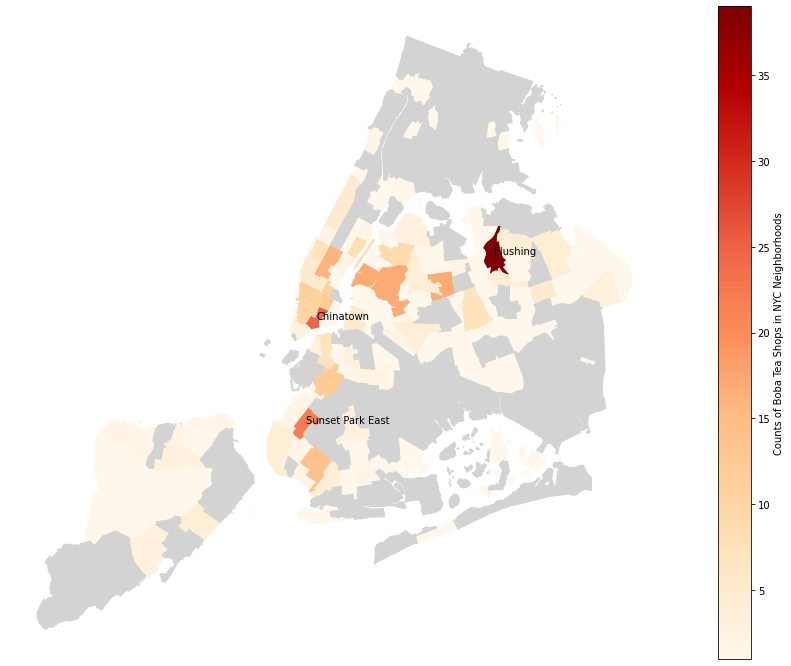

In [19]:
fig, ax = plt.subplots(figsize=(20, 12), sharey=False)
# neighborhoods.plot(ax=ax, edgecolor="grey", linewidth=0.4, facecolor='none')
missing_kwds={"color": "lightgrey","edgecolor": "lightgrey","label": "Missing values"}
group_nt_gdf.plot(ax=ax, column='counts', colormap='OrRd', edgecolor="none", linewidth=1, legend=True, legend_kwds = {'label': "Counts of Boba Tea Shops in NYC Neighborhoods"}, missing_kwds=missing_kwds)

top_counts = group_nt_gdf.sort_values("counts", ascending=False)[0:3]
for x, y, label in zip(top_counts.label_geometry.x, top_counts.label_geometry.y, top_counts.ntaname):
    ax.annotate(label, xy=(x, y))

ax.set_axis_off()

/Users/ho/opt/anaconda3/envs/pyv37/lib/python3.7/site-packages/geopandas/plotting.py:630: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


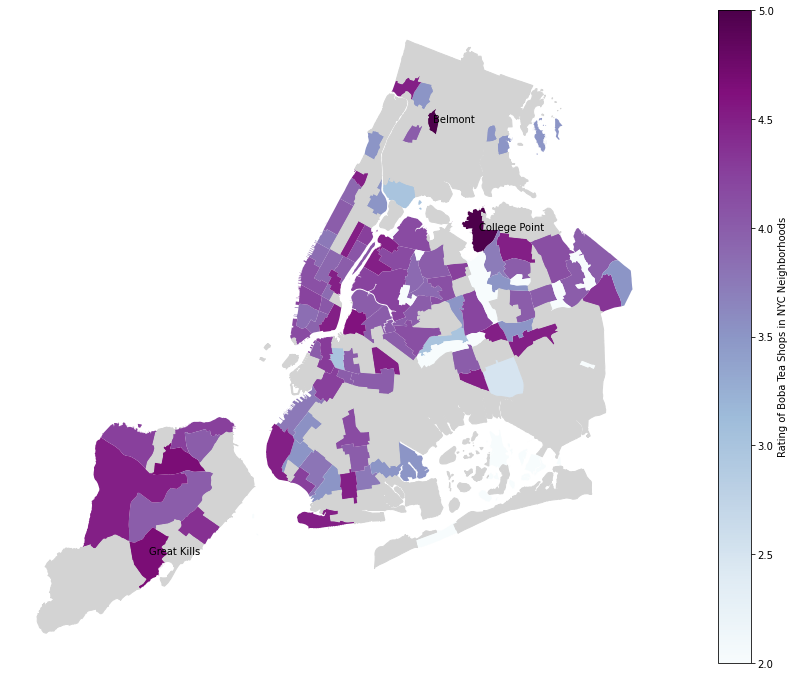

In [20]:
fig, ax = plt.subplots(figsize=(20, 12), sharey=False)

missing_kwds={"color": "lightgrey","edgecolor": "lightgrey","label": "Missing values"}
group_nt_gdf.plot(
    ax=ax, column='rating', colormap='BuPu', edgecolor="none", linewidth=1, legend=True,
    legend_kwds = {'label': "Rating of Boba Tea Shops in NYC Neighborhoods"}, missing_kwds=missing_kwds)

top_rated = group_nt_gdf.sort_values("rating", ascending=False)[0:3]
for x, y, label in zip(top_rated.label_geometry.x, top_rated.label_geometry.y, top_rated.ntaname):
    ax.annotate(label, xy=(x, y))
ax.set_axis_off()

/Users/ho/opt/anaconda3/envs/pyv37/lib/python3.7/site-packages/geopandas/plotting.py:630: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


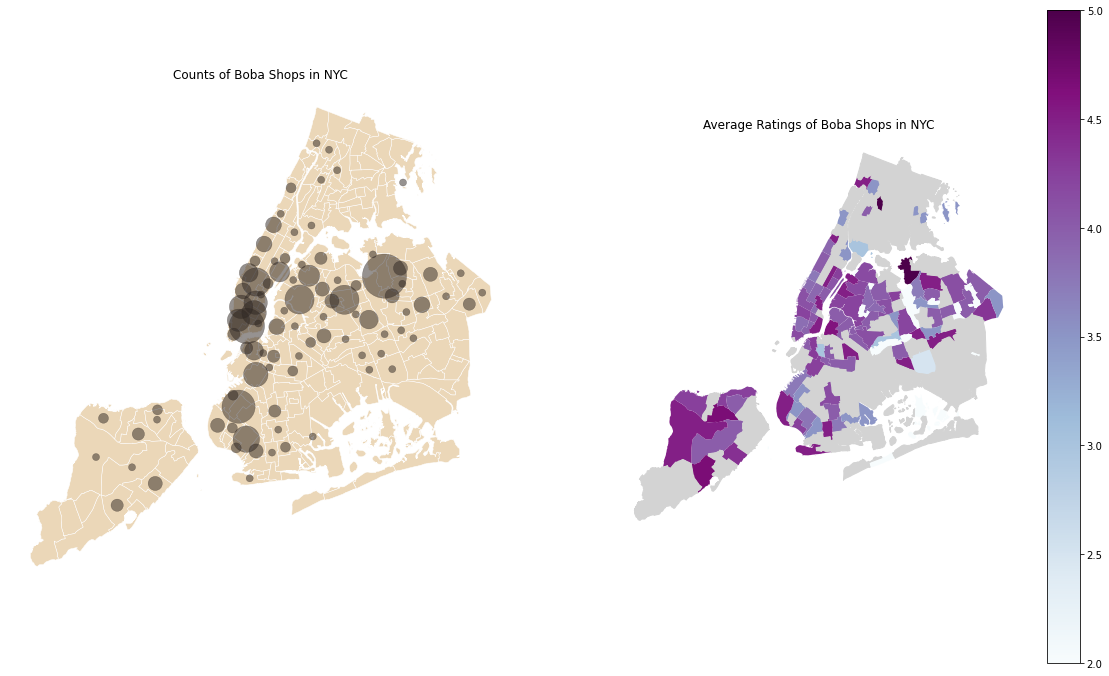

In [69]:
fig, ax = plt.subplots(1,2, figsize=(20, 12), sharey=False)


# draw counts of boba tea shops
group_nt_gdf_pt = group_nt_gdf.copy()
group_nt_gdf_pt['geometry'] = group_nt_gdf_pt['label_geometry']
group_nt_gdf_pt.head()

ax[0].title.set_text('Counts of Boba Shops in NYC')
neighborhoods.plot(ax=ax[0], color="#ebd7b8", edgecolor="white",linewidth=0.5, alpha=1) #gainsboro
group_nt_gdf_pt.plot(ax=ax[0], color="#2e2622", markersize=group_nt_gdf_pt.counts * 50, alpha=0.5, edgecolor='#2e2622', linewidth=0.4, legend=True, legend_kwds = {'label': "Counts of Boba Tea Shops in NYC Neighborhoods"})


# draw average rating of boba tea shops
ax[1].title.set_text('Average Ratings of Boba Shops in NYC')
missing_kwds={"color": "lightgrey","edgecolor": "lightgrey","label": "Missing values"}
group_nt_gdf.plot(
    ax=ax[1], column='rating', colormap='BuPu', edgecolor="none", linewidth=1, legend=True, missing_kwds=missing_kwds)

ax[0].set_axis_off()
ax[1].set_axis_off()

In [55]:
list(group_nt_gdf_pt.loc[(group_nt_gdf_pt.counts).isna()]['ntaname']) ==  list((group_nt_gdf_pt.loc[(group_nt_gdf_pt.rating).isna()])['ntaname'])
group_nt_gdf_pt.loc[group_nt_gdf_pt.ntaname=='Battery Park City-Lower Manhattan']


# group_nt_gdf_pt.plot(ax=ax[1], colormap='BuPu', column="rating", markersize=np.power(group_nt_gdf_pt.rating,2) * 20, alpha=0.5, edgecolor='#2e2622', linewidth=0.4, legend=True, missing_kwds=missing_kwds)
group_nt_gdf_pt.plot(ax=ax[1], colormap='BuPu', column="rating", markersize=group_nt_gdf_pt.counts * 80, alpha=0.9, edgecolor='#2e2622', linewidth=0.4, legend=True)

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,counts,cnt_category,rating,label_geometry
95,1.0,Manhattan,061,MN25,Battery Park City-Lower Manhattan,1.901245e+07,43732.562268,POINT (-74.01025 40.70801),3.0,1.0,4.166667,POINT (-74.01025 40.70801)
